In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

In [2]:
# Load dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# b. Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [5]:
# c. Scree Plot
plt.figure(figsize=(10, 6))
components = range(1, len(pca.explained_variance_ratio_) + 1)

<Figure size 1000x600 with 0 Axes>

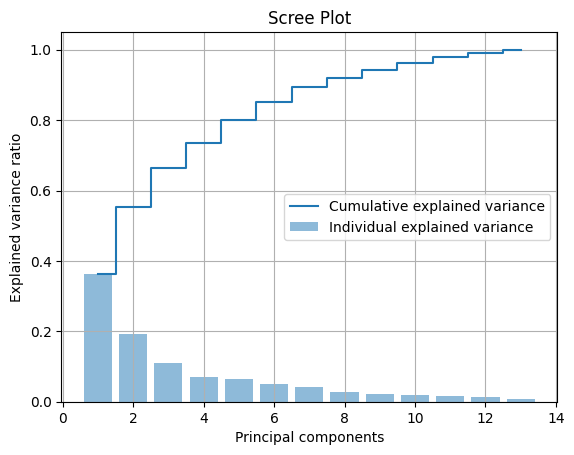

In [6]:
# Bar plot of individual explained variance
plt.bar(components, pca.explained_variance_ratio_, 
        alpha=0.5, 
        align='center',
        label='Individual explained variance')

# Line plot of cumulative variance
plt.step(components, 
         np.cumsum(pca.explained_variance_ratio_), 
         where='mid',
         label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

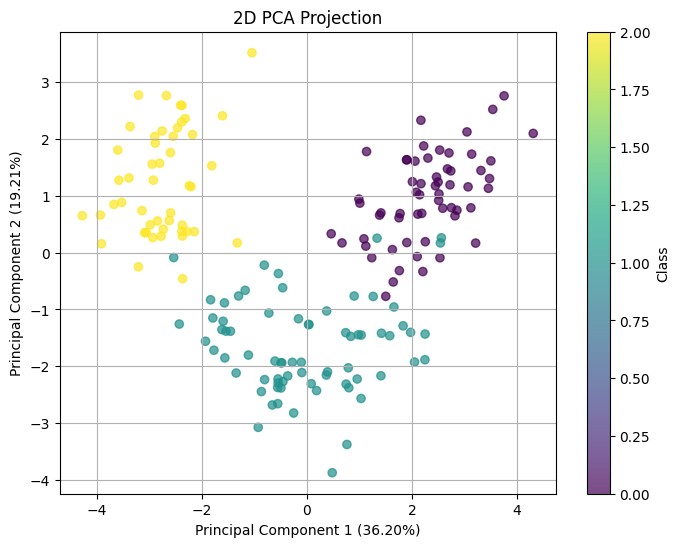

In [7]:
# d. Data Visualization in 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y, 
                     cmap='viridis',
                     alpha=0.7)

plt.xlabel('Principal Component 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('Principal Component 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
plt.title('2D PCA Projection')
plt.colorbar(scatter, label='Class')
plt.grid(True)
plt.show()

In [8]:
# Optional: Display component matrix
components_df = pd.DataFrame(pca.components_[:2], 
                            columns=feature_names,
                            index=['PC1', 'PC2'])
print("\nPrincipal Component Matrix:")
print(components_df)


Principal Component Matrix:
      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
PC1  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
PC2  0.483652    0.224931  0.316069          -0.010591   0.299634   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
PC1       0.394661    0.422934             -0.298533         0.313429   
PC2       0.065040   -0.003360              0.028779         0.039302   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
PC1        -0.088617  0.296715                      0.376167  0.286752  
PC2         0.529996 -0.279235                     -0.164496  0.364903  
